# 📸 SnapChef - AI Meal Planning Agent

**Snap your fridge, get smart recipes, reduce waste, save money**

---

## 🚀 Quick Start
1. Get Gemini API key: https://aistudio.google.com/app/apikey
2. Add to Colab Secrets (🔑 icon)
3. Run all cells (Runtime → Run all)
4. Upload fridge photo when prompted

In [ ]:
# ============================================
# CELL 1: API Key Setup
# ============================================

# Using Colab's secure secret management
from google.colab import userdata
import os

try:
    # Try to get API key from Colab Secrets
    GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')
    print("✅ API Key loaded from Colab Secrets")
except:
    # Fallback: Manual input (less secure, but works)
    print("⚠️  Colab Secret not found. Please enter your API key manually.")
    GEMINI_API_KEY = input("Enter your Gemini API key: ").strip()

    if GEMINI_API_KEY:
        print("✅ API Key entered successfully")
    else:
        print("❌ No API key provided!")

# Set as environment variable for later use
os.environ['GEMINI_API_KEY'] = GEMINI_API_KEY

print(f"\n🔐 API Key (first 10 chars): {GEMINI_API_KEY[:10]}...")
print("✅ Setup complete! Ready for next step.")

In [ ]:
# ============================================
# CELL 2: Install Dependencies
# ============================================

print("📦 Installing required packages...")
print("=" * 50)

# Install Google Generative AI SDK (for Gemini)
!pip install -q google-generativeai

# Install Pillow for image processing
!pip install -q Pillow

# Install requests for potential API calls
!pip install -q requests

print("\n✅ All packages installed successfully!")
print("=" * 50)

# Verify installations
print("\n🔍 Verifying installations...")
try:
    import google.generativeai as genai
    print(f"✅ google-generativeai version: {genai.__version__}")
except ImportError as e:
    print(f"❌ Error importing google-generativeai: {e}")

try:
    from PIL import Image
    print(f"✅ Pillow (PIL) imported successfully")
except ImportError as e:
    print(f"❌ Error importing Pillow: {e}")

try:
    import requests
    print(f"✅ requests version: {requests.__version__}")
except ImportError as e:
    print(f"❌ Error importing requests: {e}")

print("\n🎉 Ready to proceed to Step 3!")

In [ ]:
# ============================================
# CELL 3: Configure Gemini & Test Connection
# ============================================

import google.generativeai as genai
import os

print("🔧 Configuring Gemini API...")
print("=" * 50)

# Configure the API with your key
try:
    genai.configure(api_key=os.environ['GEMINI_API_KEY'])
    print("✅ Gemini API configured successfully")
except Exception as e:
    print(f"❌ Error configuring API: {e}")
    print("⚠️  Make sure you ran Cell 1 (API Setup) first!")

# List available models
print("\n📋 Available Gemini Models:")
print("-" * 50)
for model in genai.list_models():
    if 'generateContent' in model.supported_generation_methods:
        print(f"  • {model.name}")

print("\n" + "=" * 50)
print("🧪 Testing connection with a simple prompt...")
print("=" * 50)

# Test with a simple text prompt
try:
    # Try to find and use the first available model that supports generateContent
    available_models = [m.name for m in genai.list_models()
                       if 'generateContent' in m.supported_generation_methods]

    if not available_models:
        raise Exception("No models available with generateContent support")

    # Use the first available model
    model_name = available_models[0]
    print(f"Using model: {model_name}")

    model = genai.GenerativeModel(model_name)
    response = model.generate_content("Say 'Hello! I am working!' in just one friendly way.")

    print(f"\n✅ SUCCESS! Gemini responded:")
    print("-" * 50)
    print(response.text)
    print("-" * 50)
    print("\n🎉 Gemini is working perfectly!")
    print("✅ Ready to move to Step 4: Image Upload & Processing")

except Exception as e:
    print(f"\n❌ Error testing Gemini: {e}")
    print("\n🔍 Troubleshooting tips:")
    print("  1. Check that your API key is correct")
    print("  2. Make sure you have API quota available")
    print("  3. Try running Cell 1 again")

In [4]:
# ============================================
# CELL 4: Image Upload & Display Helper
# ============================================

from google.colab import files
from PIL import Image
import io

print("📸 Image Upload & Processing Setup")
print("=" * 50)

def upload_fridge_image():
    """
    Upload an image from your computer using Colab's file upload widget
    Returns: PIL Image object
    """
    print("\n📤 Click 'Choose Files' to upload your fridge/pantry image...")
    uploaded = files.upload()

    if not uploaded:
        print("❌ No file uploaded!")
        return None

    # Get the first uploaded file
    filename = list(uploaded.keys())[0]
    print(f"✅ Uploaded: {filename}")

    # Open as PIL Image
    image = Image.open(io.BytesIO(uploaded[filename]))

    # Display the image
    print(f"\n🖼️  Image size: {image.size[0]} x {image.size[1]} pixels")
    display(image)

    return image

# Test the upload function
print("\n✅ Upload function ready!")
print("\n" + "=" * 50)
print("🧪 TEST: Let's upload a fridge image")
print("=" * 50)
print("\n💡 You can use:")
print("   • A photo of your actual fridge")
print("   • A test image from Google Images")
print("   • Any image with food items")
print("\n👇 Run the cell below when ready to upload:")
print("-" * 50)

# Uncomment the line below to test upload immediately
# test_image = upload_fridge_image()

📸 Image Upload & Processing Setup

✅ Upload function ready!

🧪 TEST: Let's upload a fridge image

💡 You can use:
   • A photo of your actual fridge
   • A test image from Google Images
   • Any image with food items

👇 Run the cell below when ready to upload:
--------------------------------------------------


🧪 Testing image upload...

📤 Click 'Choose Files' to upload your fridge/pantry image...


Saving fridge_sample_1.png to fridge_sample_1.png
✅ Uploaded: fridge_sample_1.png

🖼️  Image size: 830 x 1293 pixels


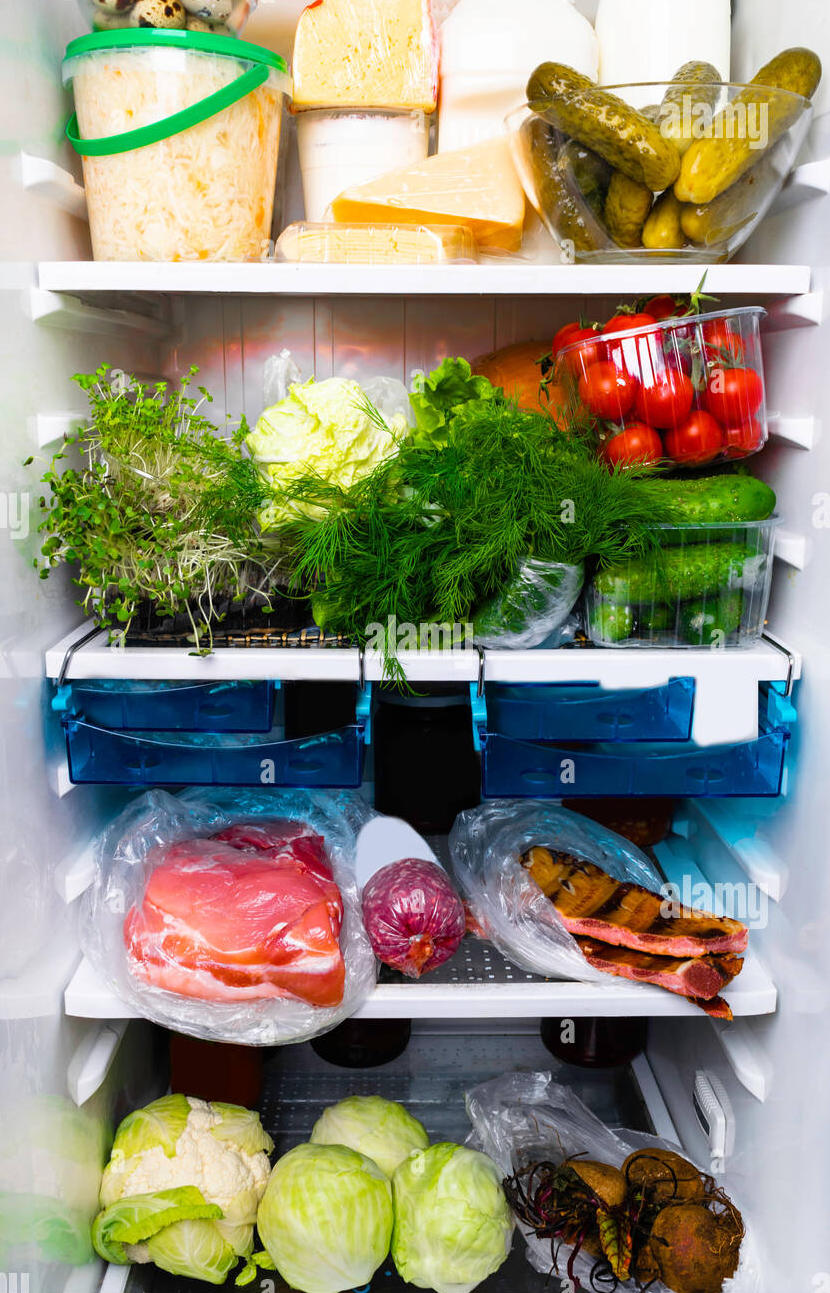


✅ Image uploaded successfully!
📊 Image format: PNG
📐 Image mode: RGB

✅ Ready for Step 5: Vision Test with Gemini


In [5]:
# ============================================
# CELL 5: Test Image Upload
# ============================================

print("🧪 Testing image upload...")
test_image = upload_fridge_image()

if test_image:
    print("\n✅ Image uploaded successfully!")
    print(f"📊 Image format: {test_image.format}")
    print(f"📐 Image mode: {test_image.mode}")
    print("\n✅ Ready for Step 5: Vision Test with Gemini")
else:
    print("❌ Upload failed. Try again!")

In [6]:
# ============================================
# CELL 6: Gemini Vision - Ingredient Detection
# ============================================

import google.generativeai as genai

print("👁️ Gemini Vision - Ingredient Detection")
print("=" * 50)

def detect_ingredients(image, additional_context=""):
    """
    Use Gemini Vision to identify ingredients in a fridge/pantry image

    Args:
        image: PIL Image object
        additional_context: Optional text like "focus on vegetables" or "check expiry dates"

    Returns:
        String with detected ingredients
    """

    # Configure the model for vision tasks
    model = genai.GenerativeModel('models/gemini-2.5-flash')

    # Create a detailed prompt for ingredient detection
    prompt = f"""
    You are an expert food inventory assistant. Analyze this image of a fridge/pantry/kitchen.

    Your task:
    1. Identify ALL visible food items and ingredients
    2. Be specific (e.g., "red bell peppers" not just "vegetables")
    3. Estimate quantities where visible (e.g., "3 eggs", "half a bottle of milk")
    4. Note the condition if visible (fresh, wilted, etc.)
    5. Organize by category (proteins, vegetables, dairy, grains, condiments, etc.)

    {additional_context}

    Format your response as a clear, organized list by category.
    """

    print("\n🔍 Analyzing image with Gemini Vision...")
    print("-" * 50)

    try:
        # Generate content with both image and text
        response = model.generate_content([prompt, image])

        print("✅ Analysis complete!")
        print("=" * 50)
        print("\n📋 DETECTED INGREDIENTS:\n")
        print(response.text)
        print("\n" + "=" * 50)

        return response.text

    except Exception as e:
        print(f"❌ Error during vision analysis: {e}")
        return None

# Test instructions
print("\n📸 Ready to test ingredient detection!")
print("\n💡 Make sure you have:")
print("   1. Already uploaded an image using Cell 5")
print("   2. The image is stored in variable 'test_image'")
print("\n🧪 To test, run the following in the next cell:")
print("-" * 50)
print("ingredients = detect_ingredients(test_image)")
print("-" * 50)
print("\n✅ Function ready!")

👁️ Gemini Vision - Ingredient Detection

📸 Ready to test ingredient detection!

💡 Make sure you have:
   1. Already uploaded an image using Cell 5
   2. The image is stored in variable 'test_image'

🧪 To test, run the following in the next cell:
--------------------------------------------------
ingredients = detect_ingredients(test_image)
--------------------------------------------------

✅ Function ready!


In [7]:
# ============================================
# CELL 7: Test Ingredient Detection
# ============================================

print("🧪 Testing ingredient detection on your image...")
print()

# Make sure you have test_image from Cell 5
if 'test_image' not in globals():
    print("⚠️  No image found! Please run Cell 5 first to upload an image.")
else:
    # Run the detection
    ingredients = detect_ingredients(test_image)

    if ingredients:
        print("\n✅ Ingredient detection working!")
        print("\n📝 Saving results for next step...")
        # Store for later use
        detected_ingredients = ingredients

🧪 Testing ingredient detection on your image...


🔍 Analyzing image with Gemini Vision...
--------------------------------------------------
✅ Analysis complete!

📋 DETECTED INGREDIENTS:

Here is a detailed inventory of the visible food items in your fridge, organized by category:

**Proteins**
*   **Quail Eggs:** Approximately 15-20 eggs, fresh, stored in a clear container.
*   **Raw Pork Loin / Beef Roast:** 1 large piece (estimated 2-3 lbs / 1-1.5 kg), fresh, good color, stored in a clear plastic bag.
*   **Ground Meat:** 1 package (estimated 1 lb / 450g), fresh, appears to be ground pork or sausage meat, wrapped in plastic.
*   **Cooked/Marinated Ribs:** Several pieces (estimated 3-4 ribs), cooked and appears marinated, stored in a clear plastic bag.

**Dairy**
*   **Hard/Semi-Hard Yellow Cheese Block:** 1 large block (estimated 1-1.5 lbs / 500-700g), vacuum-sealed, fresh.
*   **Yellow Cheese Wedge:** 1 wedge (estimated 0.5 lbs / 200-300g), appears fresh.
*   **Yellow Cheese Slice:

In [8]:
# ============================================
# CELL 8: Recipe Generation with Constraints
# ============================================
import google.generativeai as genai
import json
from IPython.display import display, Image, HTML
import requests
from io import BytesIO

print("🍳 Recipe Generation System")
print("=" * 50)

def get_user_constraints():
    """
    Interactively get constraints from the user
    """
    print("\n📋 Please specify your recipe constraints:")
    print("Examples:")
    print("  - 'low-carb dinner'")
    print("  - 'vegetarian lunch under $15'")
    print("  - 'quick breakfast under 20 minutes'")
    print("  - 'kid-friendly dinner, no nuts'")

    constraints = input("\nYour constraints: ").strip()

    if not constraints:
        print("⚠️  No constraints provided. Please enter at least one constraint.")
        return get_user_constraints()  # Ask again

    return constraints




def generate_recipe_options(detected_ingredients, user_constraints):
    """
    Generate 3 recipe options based on available ingredients and user constraints

    Args:
        detected_ingredients: String with list of available ingredients
        user_constraints: String like "low-carb dinner" or "budget under $10" (REQUIRED)

    Returns:
        List of 3 recipe dictionaries
    """

    if not user_constraints or user_constraints.strip() == "":
        raise ValueError("❌ User constraints are required! Please specify your meal preferences.")

    model = genai.GenerativeModel('models/gemini-2.5-flash')

    # UPDATED PROMPT - Better handling of ingredients
    prompt = f"""
    You are a professional chef and meal-planning expert.
    Your task is to generate exactly 3 distinct recipe options.

    IMPORTANT RULES:
    1. Use available ingredients ONLY where they make culinary sense together
       - Don't force ingredients into a recipe just to use them
       - Create realistic, delicious recipes people would actually cook

    2. BASIC PANTRY STAPLES (assume always available, do NOT list as needed):
       - Salt, pepper, common spices (garlic powder, onion powder)
       - Cooking oil (olive oil, vegetable oil)
       - Water
       - Flour, sugar (small amounts for cooking)

    3. Minimize additional grocery items to reduce cost and waste

    4. Strictly respect user's constraints (diet, budget, time, allergies, etc.)

    5. Provide variety: different cuisines, cooking methods, or styles across the 3 options

    AVAILABLE INGREDIENTS:
    {detected_ingredients}

    USER CONSTRAINTS:
    {user_constraints}

    Create 3 complete recipe options and respond in the following JSON format ONLY (no markdown, no backticks):
    {{
        "recipes": [
            {{
                "recipe_name": "Name of the dish",
                "meal_type": "breakfast/lunch/dinner/snack",
                "servings": 2,
                "prep_time": "15 minutes",
                "cook_time": "20 minutes",
                "difficulty": "easy/medium/hard",
                "cuisine_style": "Italian/Mexican/Asian/American/etc",
                "ingredients_used": [
                    {{"item": "ingredient from available list", "quantity": "amount used"}},
                ],
                "ingredients_needed": [
                    {{"item": "missing ingredient (NOT basic staples)", "quantity": "amount needed", "category": "protein/vegetable/spice/sauce/etc"}},
                ],
                "instructions": [
                    "Step 1 description",
                    "Step 2 description"
                ],
                "nutrition_estimate": {{
                    "calories": "approximate calories per serving",
                    "protein": "grams",
                    "carbs": "grams",
                    "fat": "grams"
                }},
                "waste_reduction_score": "percentage of available ingredients used that are appropriate for this recipe (0-100)",
                "chef_notes": "Any tips or substitution suggestions",
                "image_search_query": "simple search term for the dish (e.g., 'chicken pasta' or 'vegetable stir fry')"
            }},
            // ... 2 more recipe options with different approaches
        ]
    }}
    """

    print("\n🔍 Generating 3 recipe options...")
    print("-" * 50)

    try:
        response = model.generate_content(prompt)

        # Parse the JSON response
        response_text = response.text.strip()

        # Remove markdown code blocks if present
        if response_text.startswith("```"):
            response_text = response_text.split("```")[1]
            if response_text.startswith("json"):
                response_text = response_text[4:]
            response_text = response_text.strip()

        recipe_data = json.loads(response_text)

        print("✅ 3 recipe options generated successfully!")
        print("=" * 50)

        return recipe_data.get('recipes', [])

    except json.JSONDecodeError as e:
        print(f"⚠️  JSON parsing error: {e}")
        print("Raw response:", response.text[:500])
        return None
    except Exception as e:
        print(f"❌ Error generating recipes: {e}")
        return None


def get_recipe_image(search_query):
    """
    Fetch a recipe image from Unsplash API (free, no API key needed for basic use)
    """
    try:
        # Using Unsplash's public API endpoint
        url = f"https://source.unsplash.com/400x300/?{search_query},food,dish"
        return url
    except Exception as e:
        print(f"⚠️  Could not fetch image: {e}")
        return None

def display_recipe_options(recipes):
    """
    Display 3 recipe options with images in a beautiful format
    """
    if not recipes or len(recipes) == 0:
        print("❌ No recipe options to display")
        return

    print("\n" + "="*80)
    print("🍽️  YOUR RECIPE OPTIONS")
    print("="*80)

    html_content = """
    <style>
        .recipe-container {
            display: flex;
            justify-content: space-between;
            gap: 20px;
            margin: 20px 0;
        }
        .recipe-card {
            border: 2px solid #ddd;
            border-radius: 10px;
            padding: 15px;
            width: 30%;
            box-shadow: 0 4px 6px rgba(0,0,0,0.1);
            background-color: white;
        }
        .recipe-card img {
            width: 100%;
            height: 200px;
            object-fit: cover;
            border-radius: 8px;
            margin-bottom: 10px;
        }
        .recipe-card h3 {
            color: #2c3e50;
            margin: 10px 0;
            font-size: 18px;
        }
        .recipe-info {
            margin: 8px 0;
            font-size: 14px;
            color: #555;
        }
        .recipe-info strong {
            color: #2c3e50;
        }
        .badge {
            display: inline-block;
            padding: 4px 8px;
            border-radius: 4px;
            font-size: 12px;
            margin-right: 5px;
            margin-top: 5px;
        }
        .badge-prep {
            background-color: #3498db;
            color: white;
        }
        .badge-calories {
            background-color: #e74c3c;
            color: white;
        }
        .badge-items {
            background-color: #f39c12;
            color: white;
        }
        .option-number {
            background-color: #2ecc71;
            color: white;
            padding: 5px 10px;
            border-radius: 5px;
            font-weight: bold;
            display: inline-block;
            margin-bottom: 10px;
        }
    </style>
    <div class="recipe-container">
    """

    for i, recipe in enumerate(recipes[:3], 1):
        # Get image URL
        image_url = get_recipe_image(recipe.get('image_search_query', recipe.get('recipe_name', 'food')))

        # Count missing items
        missing_count = len(recipe.get('ingredients_needed', []))

        # Get nutrition info
        calories = recipe.get('nutrition_estimate', {}).get('calories', 'N/A')

        # Get prep + cook time
        prep = recipe.get('prep_time', 'N/A')
        cook = recipe.get('cook_time', 'N/A')

        html_content += f"""
        <div class="recipe-card">
            <div class="option-number">Option {i}</div>
            <img src="{image_url}" alt="{recipe.get('recipe_name', 'Recipe')}">
            <h3>{recipe.get('recipe_name', 'Recipe')}</h3>
            <div class="recipe-info">
                <strong>Cuisine:</strong> {recipe.get('cuisine_style', 'N/A')}
            </div>
            <div>
                <span class="badge badge-prep">⏱️ Prep: {prep}</span>
                <span class="badge badge-calories">🔥 {calories} cal</span>
                <span class="badge badge-items">🛒 {missing_count} items needed</span>
            </div>
            <div class="recipe-info" style="margin-top: 10px;">
                <strong>Difficulty:</strong> {recipe.get('difficulty', 'N/A').capitalize()}
            </div>
        </div>
        """

    html_content += """
    </div>
    """

    # Display HTML
    display(HTML(html_content))

    # Print text summary as well
    print("\n📋 QUICK SUMMARY:\n")
    for i, recipe in enumerate(recipes[:3], 1):
        print(f"Option {i}: {recipe.get('recipe_name', 'Recipe')}")
        print(f"  ⏱️  Prep: {recipe.get('prep_time', 'N/A')} | Cook: {recipe.get('cook_time', 'N/A')}")
        print(f"  🔥 Calories: {recipe.get('nutrition_estimate', {}).get('calories', 'N/A')} per serving")
        print(f"  🛒 Missing items: {len(recipe.get('ingredients_needed', []))}")
        if recipe.get('ingredients_needed'):
            items = [ing['item'] for ing in recipe.get('ingredients_needed', [])]
            print(f"     Need: {', '.join(items)}")
        else:
            print(f"     ✅ You have everything!")
        print()

def select_recipe(recipes):
    """
    Let user select which recipe they want
    """
    if not recipes:
        return None

    print("="*80)
    choice = input("\nWhich recipe would you like? (1-3): ").strip()

    if choice in ['1', '2', '3']:
        selected = recipes[int(choice) - 1]
        print(f"\n✅ You selected: {selected.get('recipe_name', 'Recipe')}")
        return selected
    else:
        print("❌ Invalid choice")
        return None

def display_full_recipe(recipe_data):
    """
    Display the complete recipe details
    """
    if not recipe_data:
        print("❌ No recipe data to display")
        return

    print("\n" + "="*60)
    print(f"🍽️  {recipe_data['recipe_name'].upper()}")
    print("="*60)

    print(f"\n📊 OVERVIEW:")
    print(f"   Type: {recipe_data.get('meal_type', 'N/A')}")
    print(f"   Cuisine: {recipe_data.get('cuisine_style', 'N/A')}")
    print(f"   Servings: {recipe_data.get('servings', 'N/A')}")
    print(f"   Prep Time: {recipe_data.get('prep_time', 'N/A')}")
    print(f"   Cook Time: {recipe_data.get('cook_time', 'N/A')}")
    print(f"   Difficulty: {recipe_data.get('difficulty', 'N/A')}")

    print(f"\n♻️  WASTE REDUCTION: {recipe_data.get('waste_reduction_score', 'N/A')}% of available ingredients used!")

    print(f"\n✅ INGREDIENTS YOU HAVE:")
    for ing in recipe_data.get('ingredients_used', []):
        print(f"   • {ing['quantity']} - {ing['item']}")

    if recipe_data.get('ingredients_needed'):
        print(f"\n🛒 SHOPPING LIST (Missing Items):")
        for ing in recipe_data['ingredients_needed']:
            print(f"   • {ing['quantity']} - {ing['item']} ({ing.get('category', 'misc')})")
    else:
        print(f"\n🎉 NO SHOPPING NEEDED! You have everything!")

    print(f"\n📝 INSTRUCTIONS:")
    for i, step in enumerate(recipe_data.get('instructions', []), 1):
        print(f"   {i}. {step}")

    print(f"\n🥗 NUTRITION (per serving):")
    nutrition = recipe_data.get('nutrition_estimate', {})
    print(f"   Calories: {nutrition.get('calories', 'N/A')}")
    print(f"   Protein: {nutrition.get('protein', 'N/A')}")
    print(f"   Carbs: {nutrition.get('carbs', 'N/A')}")
    print(f"   Fat: {nutrition.get('fat', 'N/A')}")

    if recipe_data.get('chef_notes'):
        print(f"\n👨‍🍳 CHEF'S NOTES:")
        print(f"   {recipe_data['chef_notes']}")

    print("\n" + "="*60)

def run_recipe_generator():
    """
    Complete interactive recipe generation workflow
    """
    print("\n" + "="*60)
    print("🍳 INTERACTIVE RECIPE GENERATOR")
    print("="*60)

    # Get constraints
    constraints = get_user_constraints()

    # Generate 3 recipe options
    recipes = generate_recipe_options(detected_ingredients, constraints)

    if not recipes:
        print("❌ Failed to generate recipes")
        return None, None

    # Display options with images
    display_recipe_options(recipes)

    # Let user select
    selected_recipe = select_recipe(recipes)

    return selected_recipe, recipes

# Ready message
print("\n✅ Recipe generation system ready!")
print("\n💡 Usage:")
print("   selected_recipe, all_recipes = run_recipe_generator()")
print("\n   Then use Cell 9 to view full recipe and handle shopping list")

🍳 Recipe Generation System

✅ Recipe generation system ready!

💡 Usage:
   selected_recipe, all_recipes = run_recipe_generator()

   Then use Cell 9 to view full recipe and handle shopping list


In [10]:
# ============================================
# CELL 9: Test Recepie Generator
# ============================================
selected_recipe, all_recipes = run_recipe_generator()


🍳 INTERACTIVE RECIPE GENERATOR

📋 Please specify your recipe constraints:
Examples:
  - 'low-carb dinner'
  - 'vegetarian lunch under $15'
  - 'quick breakfast under 20 minutes'
  - 'kid-friendly dinner, no nuts'

Your constraints: low fat, 30 grams proteins per person, 50 grams carbs, for 3 people

🔍 Generating 3 recipe options...
--------------------------------------------------
✅ 3 recipe options generated successfully!

🍽️  YOUR RECIPE OPTIONS



📋 QUICK SUMMARY:

Option 1: Herb Roasted Pork Loin with Root Vegetable & Cauliflower Mash
  ⏱️  Prep: 20 minutes | Cook: 60 minutes
  🔥 Calories: 470 per serving
  🛒 Missing items: 0
     ✅ You have everything!

Option 2: Hearty Ground Meat & Green Cabbage Skillet with Sauerkraut & Poached Quail Eggs
  ⏱️  Prep: 15 minutes | Cook: 30 minutes
  🔥 Calories: 450 per serving
  🛒 Missing items: 0
     ✅ You have everything!

Option 3: Lean Rib Meat & Fresh Greens Salad Wraps with Tangy Slaw
  ⏱️  Prep: 25 minutes | Cook: 5 minutes (if reheating ribs)
  🔥 Calories: 380 per serving
  🛒 Missing items: 2
     Need: Vinegar, Dijon Mustard


Which recipe would you like? (1-3): 3

✅ You selected: Lean Rib Meat & Fresh Greens Salad Wraps with Tangy Slaw


In [ ]:
# ============================================
# CELL 10: Full Recipe Display & Shopping List Management
# ============================================

import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

print("📋 Recipe Display & Shopping List System")
print("=" * 50)

def display_full_recipe(recipe_data):
    """
    Display the complete recipe details
    """
    if not recipe_data:
        print("❌ No recipe data to display")
        return

    print("\n" + "="*60)
    print(f"🍽️  {recipe_data['recipe_name'].upper()}")
    print("="*60)

    print(f"\n📊 OVERVIEW:")
    print(f"   Type: {recipe_data.get('meal_type', 'N/A')}")
    print(f"   Cuisine: {recipe_data.get('cuisine_style', 'N/A')}")
    print(f"   Servings: {recipe_data.get('servings', 'N/A')}")
    print(f"   Prep Time: {recipe_data.get('prep_time', 'N/A')}")
    print(f"   Cook Time: {recipe_data.get('cook_time', 'N/A')}")
    print(f"   Difficulty: {recipe_data.get('difficulty', 'N/A')}")

    print(f"\n♻️  WASTE REDUCTION: {recipe_data.get('waste_reduction_score', 'N/A')}% of available ingredients used!")

    print(f"\n✅ INGREDIENTS YOU HAVE:")
    for ing in recipe_data.get('ingredients_used', []):
        print(f"   • {ing['quantity']} - {ing['item']}")

    if recipe_data.get('ingredients_needed'):
        print(f"\n🛒 SHOPPING LIST (Missing Items):")
        for ing in recipe_data['ingredients_needed']:
            print(f"   • {ing['quantity']} - {ing['item']} ({ing.get('category', 'misc')})")
    else:
        print(f"\n🎉 NO SHOPPING NEEDED! You have everything!")

    print(f"\n📝 INSTRUCTIONS:")
    for i, step in enumerate(recipe_data.get('instructions', []), 1):
        print(f"   {i}. {step}")

    print(f"\n🥗 NUTRITION (per serving):")
    nutrition = recipe_data.get('nutrition_estimate', {})
    print(f"   Calories: {nutrition.get('calories', 'N/A')}")
    print(f"   Protein: {nutrition.get('protein', 'N/A')}")
    print(f"   Carbs: {nutrition.get('carbs', 'N/A')}")
    print(f"   Fat: {nutrition.get('fat', 'N/A')}")

    if recipe_data.get('chef_notes'):
        print(f"\n👨‍🍳 CHEF'S NOTES:")
        print(f"   {recipe_data['chef_notes']}")

    print("\n" + "="*60)

def create_shopping_list_text(recipe_data):
    """
    Create a formatted text shopping list
    """
    if not recipe_data or not recipe_data.get('ingredients_needed'):
        return "No items needed - you have everything!"

    text = f"🛒 SHOPPING LIST FOR: {recipe_data['recipe_name']}\n"
    text += "=" * 60 + "\n\n"

    for item in recipe_data['ingredients_needed']:
        text += f"☐ {item['quantity']} - {item['item']} ({item.get('category', 'misc')})\n"

    text += "\n" + "=" * 60 + "\n"
    text += f"Total items: {len(recipe_data['ingredients_needed'])}\n"

    return text

def export_shopping_list(recipe_data):
    """
    Export shopping list to clipboard (copy-paste ready)
    """
    if not recipe_data:
        print("❌ No recipe data available")
        return

    text_list = create_shopping_list_text(recipe_data)

    print("\n" + "="*60)
    print("📋 COPY & PASTE SHOPPING LIST")
    print("="*60)
    print(text_list)
    print("\n💡 Copy the list above and paste it into:")
    print("   • Instacart, Uber Eats, DoorDash, or any grocery app")
    print("   • Your notes app for manual shopping")
    print("   • A text message to share with someone")

    return text_list

def email_shopping_list(recipe_data):
    """
    Email the shopping list to a recipient
    """
    if not recipe_data:
        print("❌ No recipe data available")
        return

    if not recipe_data.get('ingredients_needed'):
        print("🎉 No shopping needed - you have everything!")
        return

    print("\n" + "="*60)
    print("📧 EMAIL SHOPPING LIST")
    print("="*60)

    # Get email details
    recipient = input("\nRecipient email address: ").strip()
    if not recipient or '@' not in recipient:
        print("❌ Invalid email address")
        return

    sender_email = input("Your email address: ").strip()
    if not sender_email or '@' not in sender_email:
        print("❌ Invalid email address")
        return

    # Note: For Gmail, you need an "App Password" not your regular password
    print("\n💡 For Gmail users: Use an App Password (not your regular password)")
    print("   Generate one at: https://myaccount.google.com/apppasswords")
    sender_password = input("Your email password (or App Password): ").strip()

    if not sender_password:
        print("❌ Password required")
        return

    # Create email content
    subject = f"Shopping List: {recipe_data['recipe_name']}"

    body = f"""
Hello!

Here's your shopping list for: {recipe_data['recipe_name']}

{create_shopping_list_text(recipe_data)}

Recipe Details:
- Type: {recipe_data.get('meal_type', 'N/A')}
- Servings: {recipe_data.get('servings', 'N/A')}
- Prep Time: {recipe_data.get('prep_time', 'N/A')}
- Cook Time: {recipe_data.get('cook_time', 'N/A')}

Happy cooking!
"""

    # Send email
    try:
        print("\n📤 Sending email...")

        msg = MIMEMultipart()
        msg['From'] = sender_email
        msg['To'] = recipient
        msg['Subject'] = subject
        msg.attach(MIMEText(body, 'plain'))

        # Determine SMTP server based on email provider
        if 'gmail' in sender_email.lower():
            smtp_server = 'smtp.gmail.com'
            smtp_port = 587
        elif 'outlook' in sender_email.lower() or 'hotmail' in sender_email.lower():
            smtp_server = 'smtp.office365.com'
            smtp_port = 587
        elif 'yahoo' in sender_email.lower():
            smtp_server = 'smtp.mail.yahoo.com'
            smtp_port = 587
        else:
            smtp_server = input("Enter your SMTP server (e.g., smtp.gmail.com): ").strip()
            smtp_port = 587

        server = smtplib.SMTP(smtp_server, smtp_port)
        server.starttls()
        server.login(sender_email, sender_password)
        server.send_message(msg)
        server.quit()

        print("✅ Email sent successfully!")
        print(f"   Sent to: {recipient}")

    except Exception as e:
        print(f"❌ Failed to send email: {e}")
        print("\n💡 Common issues:")
        print("   • Gmail: Make sure you're using an App Password")
        print("   • Check your email/password are correct")
        print("   • Ensure 'Less secure app access' is enabled (if applicable)")

def handle_shopping_list(recipe_data):
    """
    Interactive menu for shopping list options
    """
    if not recipe_data:
        print("❌ No recipe data available")
        return

    if not recipe_data.get('ingredients_needed'):
        print("\n🎉 NO SHOPPING NEEDED! You have everything!")
        return

    print("\n" + "="*60)
    print("🛒 SHOPPING LIST OPTIONS")
    print("="*60)
    print("\nWhat would you like to do with your shopping list?")
    print("1. 📋 Export to copy/paste (use in any app)")
    print("2. 📧 Email the list to someone")
    print("3. ❌ Skip")

    choice = input("\nEnter your choice (1-3): ").strip()

    if choice == '1':
        export_shopping_list(recipe_data)
    elif choice == '2':
        email_shopping_list(recipe_data)
    elif choice == '3':
        print("✅ Skipped")
    else:
        print("❌ Invalid choice")

def view_recipe_and_shopping(selected_recipe):
    """
    Complete workflow: Display full recipe and handle shopping list
    """
    if not selected_recipe:
        print("❌ No recipe selected. Please run Cell 8 first.")
        return

    # Display full recipe
    display_full_recipe(selected_recipe)

    # Handle shopping list
    handle_shopping_list(selected_recipe)

# Ready message
print("\n✅ Recipe display & shopping list system ready!")
print("\n💡 Usage (after running Cell 8):")
print("   view_recipe_and_shopping(selected_recipe)")
print("\n   OR run individual functions:")
print("   display_full_recipe(selected_recipe)")
print("   handle_shopping_list(selected_recipe)")

In [12]:
# ============================================
# CELL 11: View Selected Recipe & Export
# ============================================
view_recipe_and_shopping(selected_recipe)


🍽️  LEAN RIB MEAT & FRESH GREENS SALAD WRAPS WITH TANGY SLAW

📊 OVERVIEW:
   Type: lunch
   Cuisine: Fresh & Modern
   Servings: 3
   Prep Time: 25 minutes
   Cook Time: 5 minutes (if reheating ribs)
   Difficulty: easy

♻️  WASTE REDUCTION: 85% of available ingredients used!

✅ INGREDIENTS YOU HAVE:
   • 3-4 pieces (estimated 350-400g lean meat) - Cooked/Marinated Ribs
   • 1 large head, separated into leaves for wraps - Napa Cabbage / Butter Lettuce
   • 1 head, chopped for slaw - Green Leaf Lettuce
   • 1 small plant, for garnish - Microgreens / Sprouts
   • 10-12 pieces, halved - Cherry/Grape Tomatoes
   • 3 pieces, thinly sliced - Cucumbers (Mini/Persian)
   • 6-8 pieces, finely diced for slaw - Pickled Cucumbers (Gherkins)
   • 1/2 bunch, chopped for slaw - Fresh Dill
   • 1 slice, crumbled (optional, for flavor) - Yellow Cheese Slice

🛒 SHOPPING LIST (Missing Items):
   • 1-2 tbsp - Vinegar (condiment)
   • 1 tsp - Dijon Mustard (condiment)

📝 INSTRUCTIONS:
   1. Carefully remo